<a href="https://colab.research.google.com/github/convenience-tinashe-chibatamoto/Electricity-Consumption-Forecasting/blob/main/Electricity_Consumption_Forecasting_Using_fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Importing the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [14]:
# Loading the dataset
df = pd.read_csv('/content/electricityConsumptionAndProductioction.csv')
df.head(8)

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30
5,2019-01-01 05:00:00,5525,5385,1395,91,958,1455,1456,0,30
6,2019-01-01 06:00:00,5513,5349,1392,98,938,1451,1440,0,31
7,2019-01-01 07:00:00,5524,5547,1392,93,1187,1446,1394,0,34


In [15]:
# Preparing the data for Prophet
df['ds'] = pd.to_datetime(df['DateTime'])
df['y'] = df['Consumption']

In [16]:
# Creating the Prophet model
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
# Training the model
model.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmphsmjsih0/f8k8d6z2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphsmjsih0/_vltr3ig.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55040', 'data', 'file=/tmp/tmphsmjsih0/f8k8d6z2.json', 'init=/tmp/tmphsmjsih0/_vltr3ig.json', 'output', 'file=/tmp/tmphsmjsih0/prophet_model2ao8ffu1/prophet_model-20240430182915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:30:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [17]:
# Making future predictions
future = model.make_future_dataframe(periods=168, freq='H')  # Forecast for the next 7 days (168 hours)
forecast = model.predict(future)

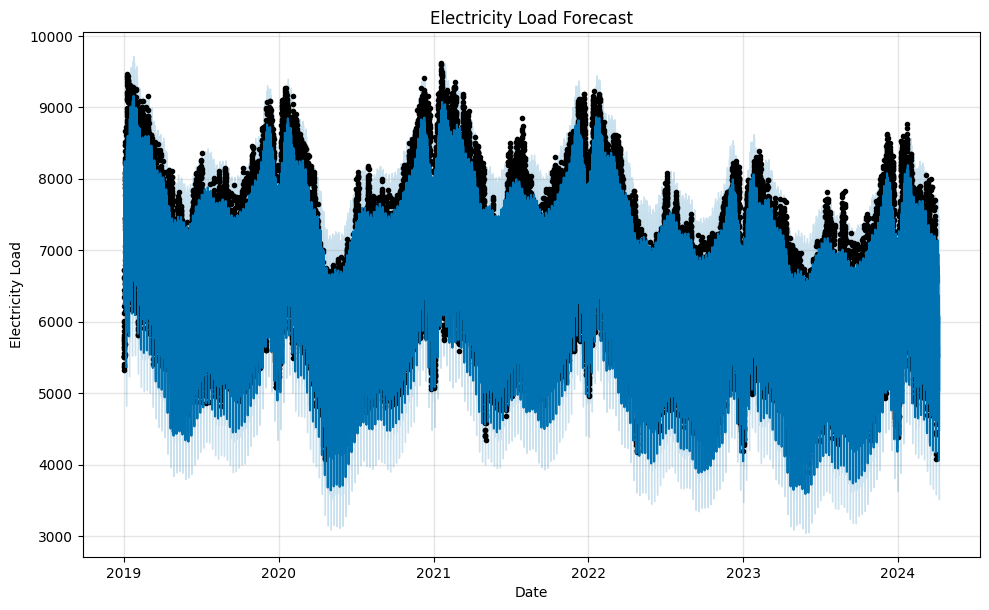

In [18]:
# Plotting the forecast
fig1 = model.plot(forecast)
plt.title('Electricity Load Forecast')
plt.xlabel('Date')
plt.ylabel('Electricity Load')
plt.show()

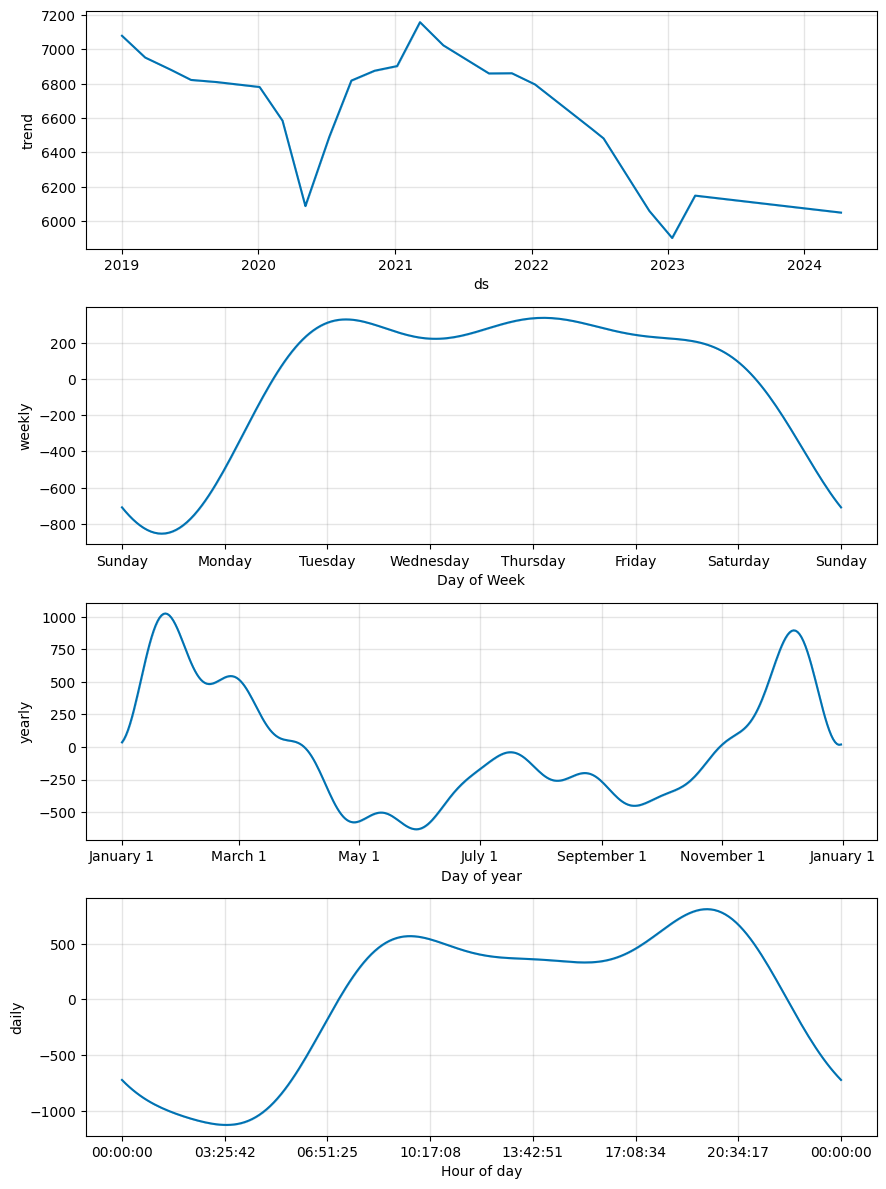

In [19]:
# Plotting the components
fig2 = model.plot_components(forecast)
plt.show()